In [9]:
import sys
import numpy

sys.path.insert(0, "../../9")

import compare_results
import process_execution_time_results

from matplotlib import pyplot

In [85]:
fileData = {}
for i in range(0,31):
    fileName = "results" + str(i) + ".json"
    fileData[fileName] = process_execution_time_results.getExecutionTimes(fileName)
fileMaps = {}
for file in fileData:
    newMap = {}
    for sample in fileData[file]:
        testName, executionTime = sample
        newMap[testName] = executionTime
    fileMaps[file] = newMap

In [86]:
benchmarkData = []
for benchmark in fileMaps["results0.json"]:
    benchmarkArray = []
    for file in fileMaps:
        benchmarkArray.append(fileMaps[file][benchmark])
    benchmarkAverage = numpy.mean(benchmarkArray)
    benchmarkStandardDeviation = numpy.std(benchmarkArray)
    benchmarkSTDPercentage = benchmarkStandardDeviation / benchmarkAverage
    benchmarkData.append((benchmark, benchmarkAverage, benchmarkStandardDeviation, benchmarkSTDPercentage))

In [87]:
benchmarkData.sort(key=lambda bData: bData[3])
print("Lowest STD/mean:" + str(benchmarkData[0][3]))
print("Benchmark name:" + str(benchmarkData[0][0]))
print("Associted standard deviation:" + str(benchmarkData[0][2]))
print("Associated mean:" + str(benchmarkData[0][1]))
highestIndex = len(benchmarkData) - 1
print("Highest STD/mean:" + str(benchmarkData[highestIndex][3]))
print("Benchmark name:" + str(benchmarkData[highestIndex][0]))
print("Associted standard deviation:" + str(benchmarkData[highestIndex][2]))
print("Associated mean:" + str(benchmarkData[highestIndex][1]))

Lowest STD/mean:5.1227450355830634e-05
Benchmark name:test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<32, GreaterThanZero, Mid>
Associted standard deviation:0.05837431619268694
Associated mean:1139.5124252176033
Highest STD/mean:1.0910128963285302
Benchmark name:test-suite :: MultiSource/Benchmarks/mediabench/adpcm/rawdaudio/rawdaudio.test
Associted standard deviation:0.001977900799150432
Associated mean:0.0018129032258064515


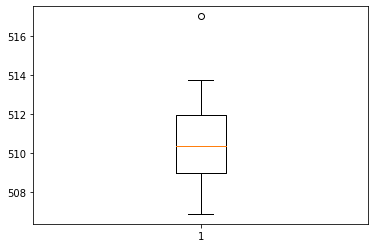

In [88]:
benchmarkResults2 = []
for file in fileMaps:
    benchmarkResults2.append(fileMaps[file][benchmarkData[100][0]])
pyplot.boxplot(benchmarkResults2)
pyplot.show()

In [89]:
for benchmarkResult in benchmarkData:
    print(benchmarkResult[0])

test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<32, GreaterThanZero, Mid>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<31, LessThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<32, LessThanZero, Mid>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<32, LessThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<64, LessThanZero, Mid>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<64, LessThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<64, GreaterThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<63, LessThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<32, GreaterThanZero, First>
test-suite :: MicroBenchmarks/MemFunctions/MemFunctions.test:BM_MemCmp<63, GreaterThanZero, First>
test-suite :: MicroBenchmarks/MemF